In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [4]:
df = pd.read_excel("Delhi.xlsx")
for i in range(319):
    df['Date'][i]=df['Date'][i][0:10]


df["Date"] = pd.to_datetime(df["Date"],format="%d-%m-%Y")

df = pd.DataFrame(data =df , columns=['Date','PM2_5'])

/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
indexeddataset = df.set_index(['Date'])

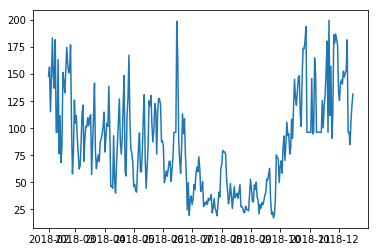

In [66]:
plt.plot(indexeddataset)

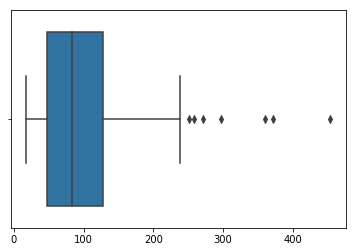

In [9]:
sns.boxplot(indexeddataset)

In [46]:
avg = indexeddataset.values.mean()
c=0
for i in range(319):
    if indexeddataset.values[i][0]>200:
        indexeddataset.values[i][0] = avg


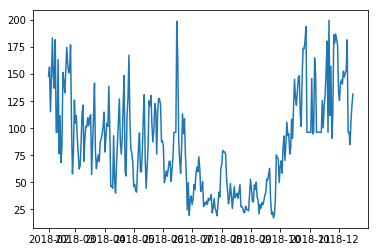

In [67]:
plt.plot(indexeddataset)

In [77]:
#detecting rolling statistics
rollmean = indexeddataset.rolling(window =24).mean()
rollstd = indexeddataset.rolling(window =24).std()

#print(rollmean,rollstd)

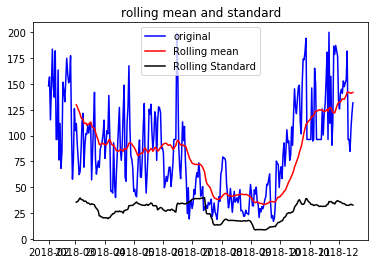

In [78]:
#plotting rolling statistics
orig = plt.plot(indexeddataset ,color ='blue', label ='original')
mean = plt.plot(rollmean, color='red', label='Rolling mean')
std = plt.plot(rollstd, color='black', label='Rolling Standard')
plt.legend(loc='best')
plt.title("rolling mean and standard")
plt.show(block=False)

In [79]:
from statsmodels.tsa.stattools import adfuller

print("Results of dickey-fuller-test")
dftest = adfuller(indexeddataset['PM2_5'],autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['test statistics','p-value','#lagsused','number of obeservations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key] = value
    
print(dfoutput)

Results of dickey-fuller-test
test statistics                  -3.192091
p-value                           0.020447
#lagsused                         4.000000
number of obeservations used    314.000000
critical value (1%)              -3.451349
critical value (5%)              -2.870789
critical value (10%)             -2.571698
dtype: float64


/home/nishant/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


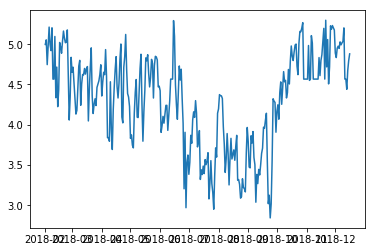

In [80]:
indexeddataset_logscale = np.log(indexeddataset)
plt.plot(indexeddataset_logscale)

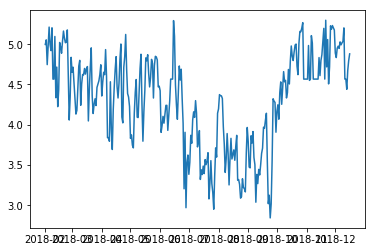

In [94]:
movingaverage = indexeddataset_logscale.rolling(window=).mean()
movingstd = indexeddataset_logscale.rolling(window=319).std()
plt.plot(indexeddataset_logscale)
plt.plot(movingaverage,color='red')

In [95]:
datasetlogscaleminusmovingaverage = indexeddataset_logscale - movingaverage
datasetlogscaleminusmovingaverage.head(30)

datasetlogscaleminusmovingaverage.dropna(inplace=True)
datasetlogscaleminusmovingaverage.head(30)

,PM2_5
Date,
2018-12-16,0.574053


In [96]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #determine rolling stats
    movingaverage = timeseries.rolling(window=319).mean()
    movingstd = timeseries.rolling(window=319).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries ,color ='blue', label ='original')
    mean = plt.plot(movingaverage, color='red', label='Rolling mean')
    std = plt.plot(movingstd, color='black', label='Rolling Standard')
    plt.legend(loc='best')
    plt.title("rolling mean and standard")
    plt.show(block=False)
    
    #perform dickey fuller test
    print("Results of dickey-fuller-test")
    dftest = adfuller(timeseries['PM2_5'],autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['test statistics','p-value','#lagsused','number of obeservations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key] = value
    
    print(dfoutput)

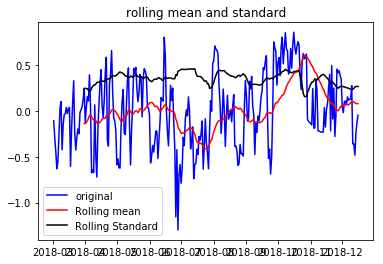

Results of dickey-fuller-test
test statistics                -6.600401e+00
p-value                         6.758511e-09
#lagsused                       0.000000e+00
number of obeservations used    2.890000e+02
critical value (1%)            -3.453182e+00
critical value (5%)            -2.871593e+00
critical value (10%)           -2.572127e+00
dtype: float64


In [91]:
test_stationary(datasetlogscaleminusmovingaverage)

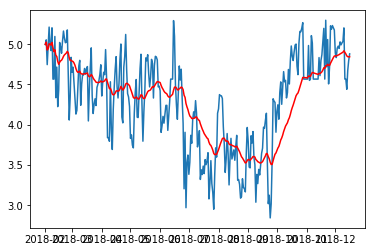

In [97]:
exponentialDecayweightedaverage = indexeddataset_logscale.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(indexeddataset_logscale)
plt.plot(exponentialDecayweightedaverage,color='Red')

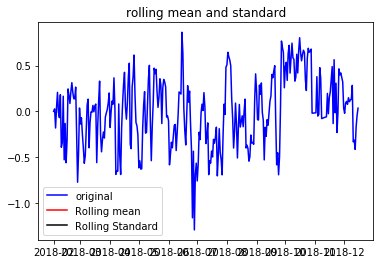

Results of dickey-fuller-test
test statistics                -7.407923e+00
p-value                         7.261769e-11
#lagsused                       0.000000e+00
number of obeservations used    3.180000e+02
critical value (1%)            -3.451082e+00
critical value (5%)            -2.870672e+00
critical value (10%)           -2.571636e+00
dtype: float64


In [98]:
datasetlogscaleminusmovingexponantialdecayaverage = indexeddataset_logscale - exponentialDecayweightedaverage                
test_stationary(datasetlogscaleminusmovingexponantialdecayaverage)